Undershot model will be built entirely on impulse (momentum transfer)
input will require river details, and turbine class



In [6]:
# imports
import numpy as np
import math
from river_class import *
import matplotlib.pyplot as plt


In [7]:
# set up river

# Define river parameters
width = 5 # m
depth = 1.2 # m
velocity = 1.5 # m/s

river = river_obj(width, depth, velocity)

In [8]:
# Define turbine parameters
radius = 0.75 # m
num_blades = 5
turbine_mass = 100
blade_mass = 3
centre_mass = 100 - (5*3)
blade_vol = 0.1
centre_vol = 0.2
g = 9.81
RPM = 15  # 15 rpm, gear ratio 16

# for undershot there will only be a y_centre parameter
y_centre = 0.2 # m - or if not calculated will be calculated through archemedes
t_width = 1 # m


In [9]:
# depth of turbine below water surface
sub_depth = y_centre - radius
unsub_depth = y_centre

def eff_depth(alpha, y_centre):
    return abs(radius*np.sin(alpha)) - y_centre

# calculate effective angle for turbine - 0 is horizontal left, flow l to r
alpha1 = np.arcsin(unsub_depth / radius)
alpha2 = math.pi - alpha1





y_centre = 0.375 is not a valid y_centre
y_centre = 0.5625 is not a valid y_centre
y_centre = 0.75 is not a valid y_centre


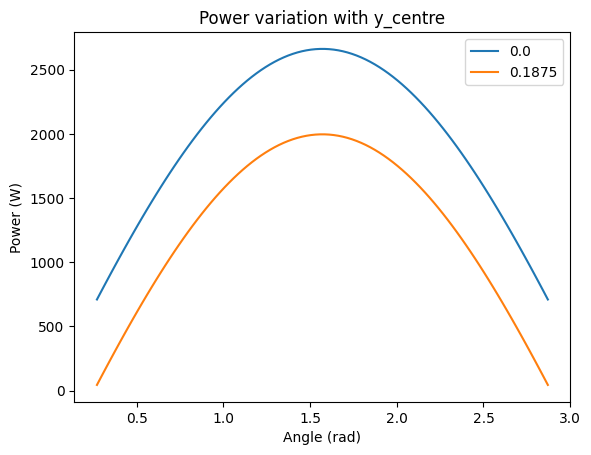

In [10]:
# do the integration (sum) of the force and therefore work done on the blade

# define the drag force
drag_coeff = 2
blade_width = 0.502  # m


# calculate the work done on the turbine
drag = river.rho * river.velocity**2 * drag_coeff * blade_width
work = drag * (eff_depth(alpha2, y_centre) - eff_depth(alpha1, y_centre))

angular_v = (RPM * 2 * math.pi) / 60

def power_calc(y_centre):
    # instantaneous power for alpha1 to alpha2
    power_inst = []
    angle_inst = np.linspace(alpha1, alpha2, 100)
    for angle in angle_inst:
        force = drag * eff_depth(angle, y_centre)
        power = force * angular_v
        power_inst.append(power)

    return power_inst, angle_inst

# in one revolution of the turbine
work_rev = work * num_blades

# plot the power variation for different y_centre
y_centre_list = np.linspace(0, radius , 5)
for y_centre in y_centre_list:
    power_inst, angle_inst = power_calc(y_centre)
    if min(power_inst) < 0:
        print('y_centre = ' + str(y_centre) + ' is not a valid y_centre')
    else:
        plt.plot(angle_inst, power_inst, label = str(y_centre))

plt.legend()
plt.xlabel('Angle (rad)')
plt.ylabel('Power (W)')
plt.title('Power variation with y_centre')
plt.show()





